In [1]:

#creating data as per expandeddata.py
import pandas as pd
import numpy as np 
raw = pd.read_csv(r'C:\Users\EdwinE\Desktop\DissProject\evpdata2.csv',encoding = "ISO-8859-1")

data = raw

data=data[raw.isnull().sum(axis=1) <3]
#size
print("Dataframe size",data.shape)
#COUNT NAN PER COLUMNS
print("Blanks per column",data.isna().sum())

data2 = data.dropna()
#size
print("Dataframe size",data2.shape)
#COUNT NAN PER COLUMNS
print("Blanks per column",data2.isna().sum())


Dataframe size (11164, 40)
Blanks per column Year                                       0
Company                                    0
Filed products                             0
PIII products                              0
PII products                               0
PI products                                0
Pre-clinical products                      0
Total pipeline products                    0
Blood products                             0
Cardiovascular products                    0
Central Nervous System products            0
Endocrine products                         0
Dermatology products                       0
Gastro-intestinal products                 0
Genito-urinary products                    0
Musculoskeletal products                   0
Oncology & Immunomodulators products       0
Respiratory products                       0
Systemic anti-infectives products          0
Sensory Organs products                    0
Various products                           0
Total prod

0    4030
1      56
Name: Target, dtype: int64


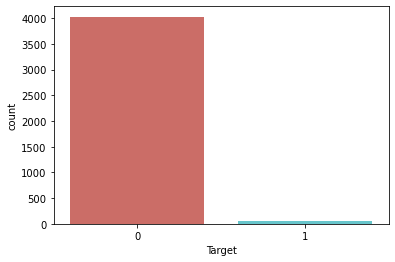

In [2]:
print(data2['Target'].value_counts())
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=data2['Target'],palette='hls')
plt.show()

In [13]:
tdata = data2
for i in tdata.iloc[:,2:39]:
    tdata[i]= np.log((tdata[i]+1-min(tdata[i])))
print(tdata.head(2))
tdata = tdata.drop(['Total products','Total pipeline products','Products with 5yr forecast','Company Acquisition','Dermatology products','Endocrine products','Filed products','Oncology & Immunomodulators products','PI products','PII products','PIII products','R&D (Group) - 5 year Spend','Total No. of Products Sourced','Various products','YE sales'],axis=1)

   Year             Company  Filed products  PIII products  PII products  \
0  2013  22nd Century Group             0.0       0.554618      0.672503   
1  2013          3-D Matrix             0.0       0.423036      0.625800   

   PI products  Pre-clinical products  Total pipeline products  \
0          0.0                    0.0                 0.554618   
1          0.0                    0.0                 0.000000   

   Blood products  Cardiovascular products  ...  Organic count  \
0             0.0                 0.423036  ...            0.0   
1             0.0                 0.423036  ...            0.0   

   Products with 5yr forecast  YE sales  5year sales  1m change on 5th year  \
0                         0.0       0.0          0.0               1.243555   
1                         0.0       0.0          0.0               1.243555   

   12m change on 5th year  5th year from organic  5th year from licensed  \
0                1.180375                    0.0           

C:\Users\EdwinE\AppData\Local\Continuum\anaconda3\envs\myen\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [74]:
print(data3.columns)
showdata = data2[['PIII products', 'PII products',
       'PI products', 'Pre-clinical products', 'Total pipeline products','Central Nervous System products','Oncology & Immunomodulators products','Systemic anti-infectives products','Total products','Number of TA','Total No. of Products Sourced','R&D (Group) - Spend',
       'R&D (Group) - 5 year Spend', 'Organic count',
       'Products with 5yr forecast', '5year sales',
        '12m change on 5th year']]


Index(['Year', 'Company', 'Filed products', 'PIII products', 'PII products',
       'PI products', 'Pre-clinical products', 'Total pipeline products',
       'Blood products', 'Cardiovascular products',
       'Central Nervous System products', 'Endocrine products',
       'Dermatology products', 'Gastro-intestinal products',
       'Genito-urinary products', 'Musculoskeletal products',
       'Oncology & Immunomodulators products', 'Respiratory products',
       'Systemic anti-infectives products', 'Sensory Organs products',
       'Various products', 'Total products', 'Number of TA',
       'In-licensing Deals', 'Joint Venture Deals',
       'Product Acquisition Deals', 'Company Acquisition',
       'Total No. of Products Sourced', 'R&D (Group) - Spend',
       'R&D (Group) - 5 year Spend', 'Organic count',
       'Products with 5yr forecast', 'YE sales', '5year sales',
       '1m change on 5th year', '12m change on 5th year',
       '5th year from organic', '5th year from licensed',

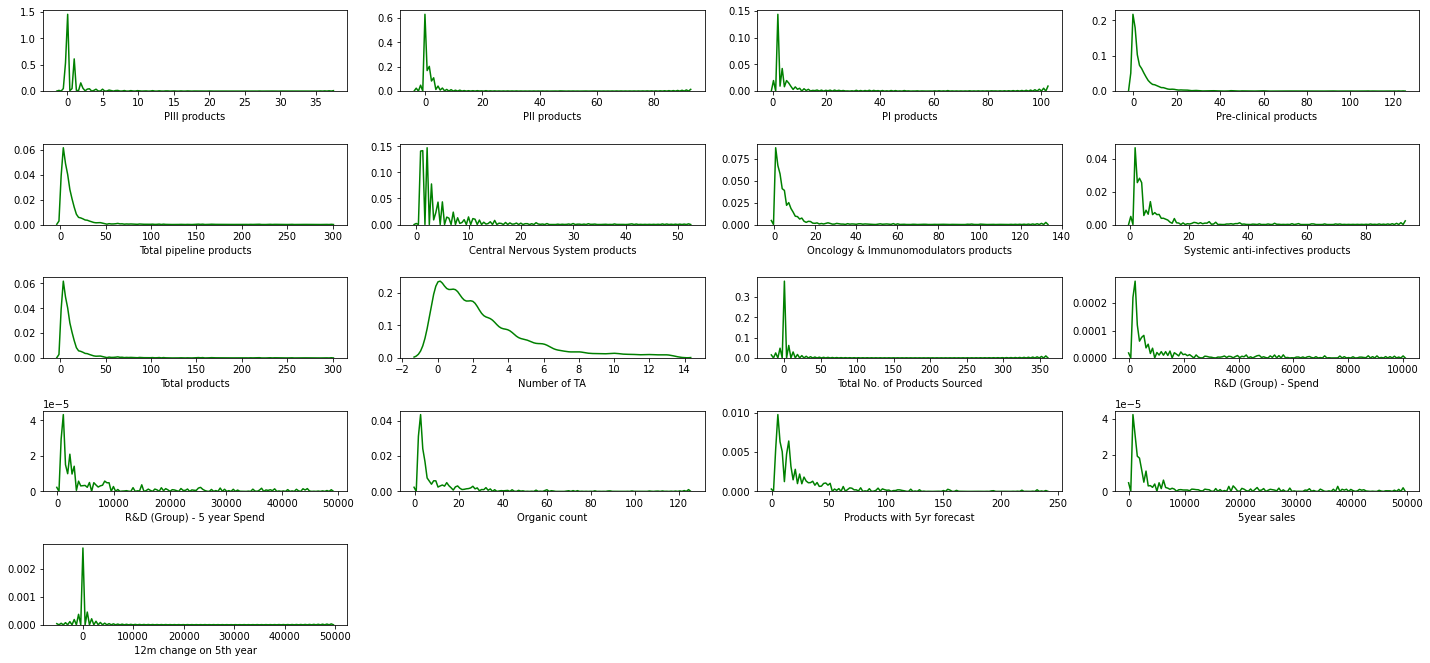

In [75]:
min_max_scaler = preprocessing.MinMaxScaler()
import matplotlib.pyplot as plt
import seaborn as sns
data3 = data2.dropna()
#showdata2 = min_max_scaler.fit_transform(showdata)
#showdata2 = pd.DataFrame(showdata2,columns=showdata.columns)
fig = plt.figure(figsize = (20, 20))
j = 0
for i in showdata.columns:
    plt.subplot(11, 4, j+1)
    j += 1
    sns.distplot(showdata[i], color='g',hist=False)
fig.tight_layout()

C:\Users\EdwinE\AppData\Local\Continuum\anaconda3\envs\myen\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\EdwinE\AppData\Local\Continuum\anaconda3\envs\myen\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\EdwinE\AppData\Local\Continuum\anaconda3\envs\myen\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\EdwinE\AppData\Local\Continuum\anaconda3\envs\myen\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\EdwinE\AppData\Local\Continuum\anaconda3\envs\myen\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default ban

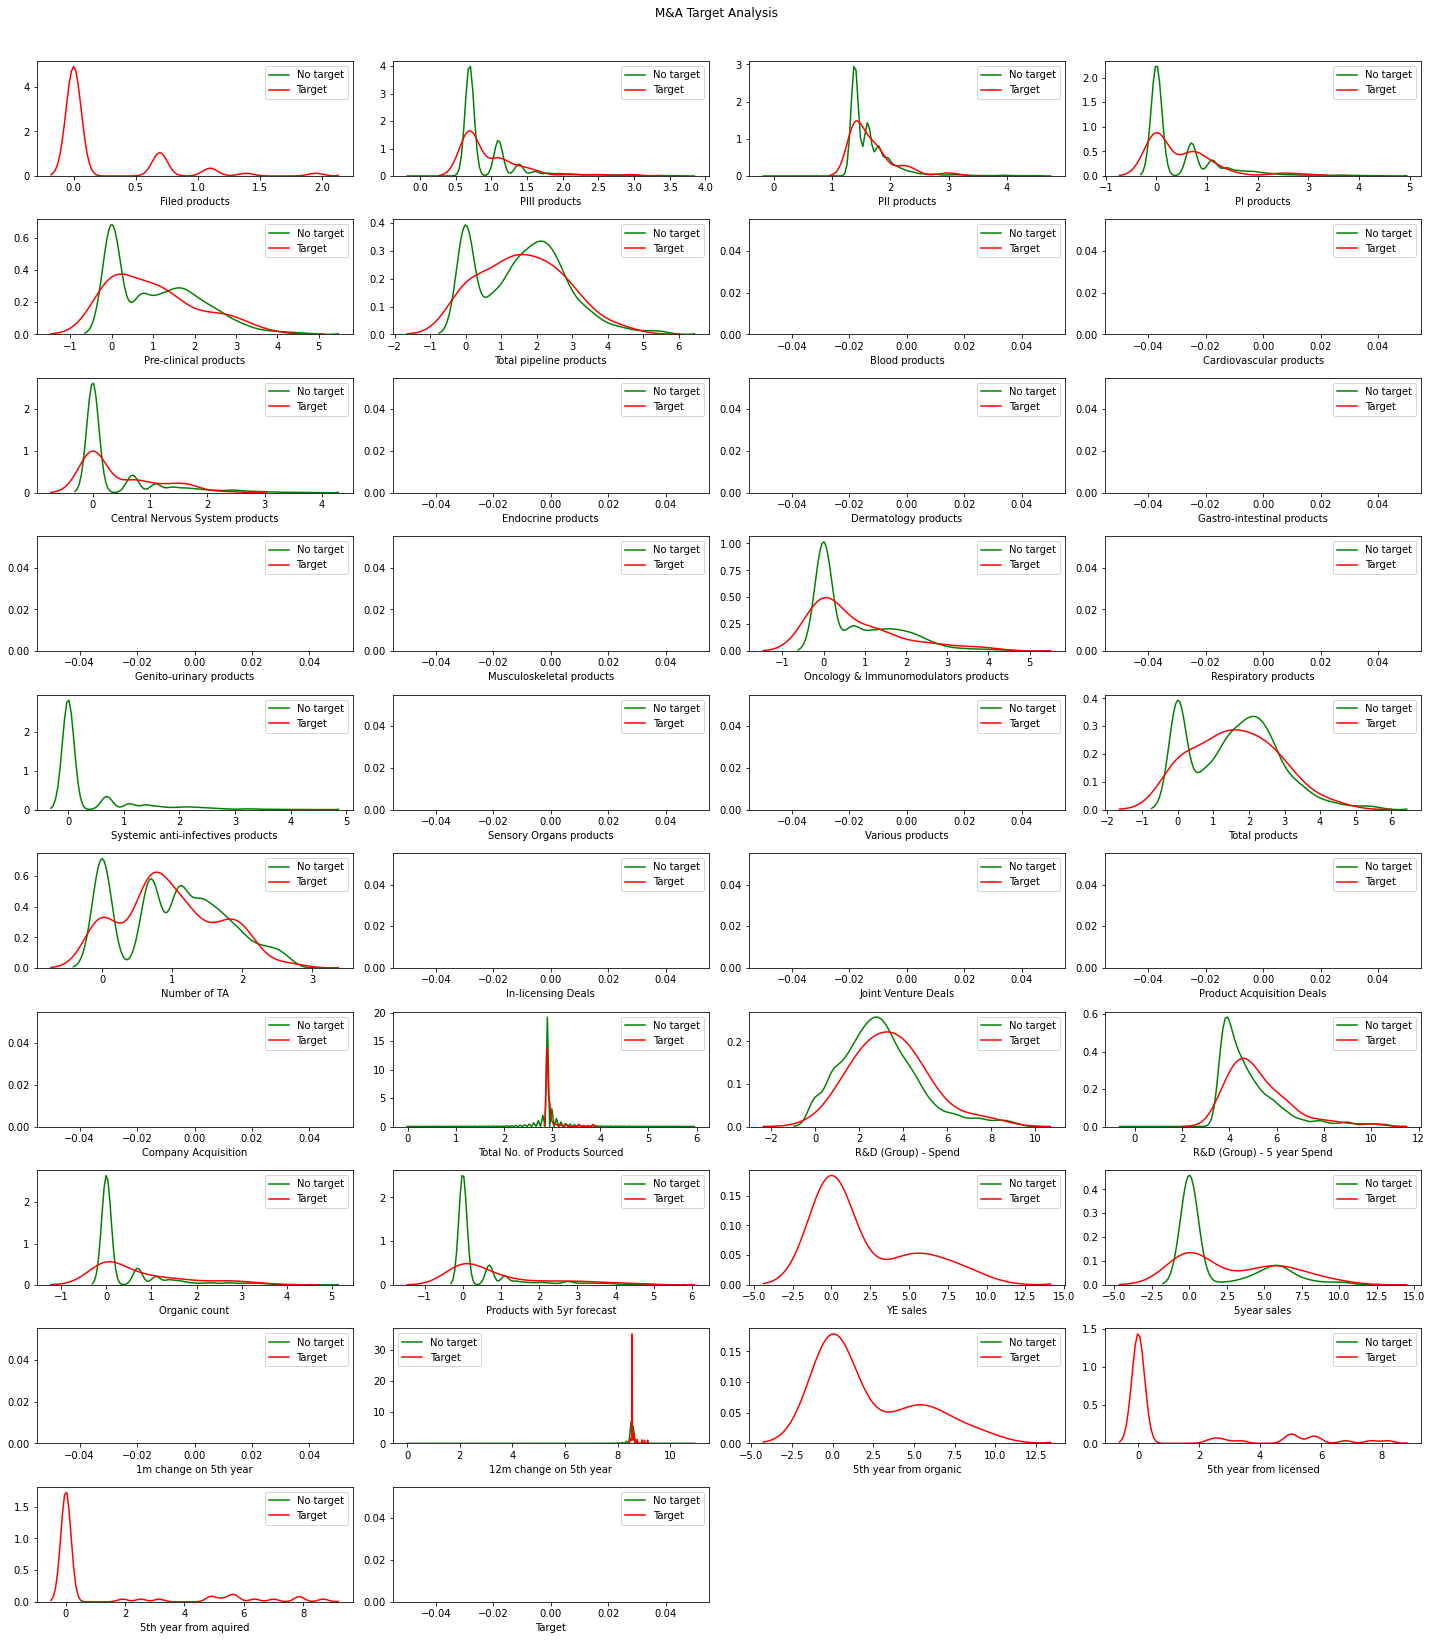

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
data3 = data2.dropna()
fig = plt.figure(figsize = (20, 25))
j = 0
for i in data3.columns[2:]:
    plt.subplot(11, 4, j+1)
    j += 1
    sns.distplot(data3[i][data3['Target']==0], color='g', label = 'No target',hist=False)
    sns.distplot(data3[i][data3['Target']==1], color='r', label = 'Target', hist = False)
    plt.legend(loc='best')
fig.suptitle('M&A Target Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

In [14]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
data3 = data2.dropna()
print("Dataframe3 size",data3.shape)
#ALTER THESE TO GET INVENTORY turnover back - it gives more samples if removed
pre2016 = tdata.query('Year != 2016')
only2016 = tdata.query('Year == 2016')
#split the features and classes out, removing company name,year and buyer
ytrain = pre2016[['Target']]
xtrain = pre2016.iloc[:,2:24]
xtrain = min_max_scaler.fit_transform(xtrain)
xtrain = pd.DataFrame(xtrain,columns=pre2016.iloc[:,2:24].columns)
print(xtrain.shape)
ytest = only2016[['Target']]
xtest = only2016.iloc[:,2:24]
xtest = min_max_scaler.fit_transform(xtest)
xtest = pd.DataFrame(xtest,columns=pre2016.iloc[:,2:24].columns)
print(xtest.shape)
print(ytrain.value_counts())
print(ytest.value_counts())
print("all data:",data3['Target'].value_counts())

Dataframe3 size (4086, 40)
(3021, 22)
(1065, 22)
Target
0         2983
1           38
dtype: int64
Target
0         1047
1           18
dtype: int64
all data: 0    4030
1      56
Name: Target, dtype: int64


C:\Users\EdwinE\AppData\Local\Continuum\anaconda3\envs\myen\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\EdwinE\AppData\Local\Continuum\anaconda3\envs\myen\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\EdwinE\AppData\Local\Continuum\anaconda3\envs\myen\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\EdwinE\AppData\Local\Continuum\anaconda3\envs\myen\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\EdwinE\AppData\Local\Continuum\anaconda3\envs\myen\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default ban

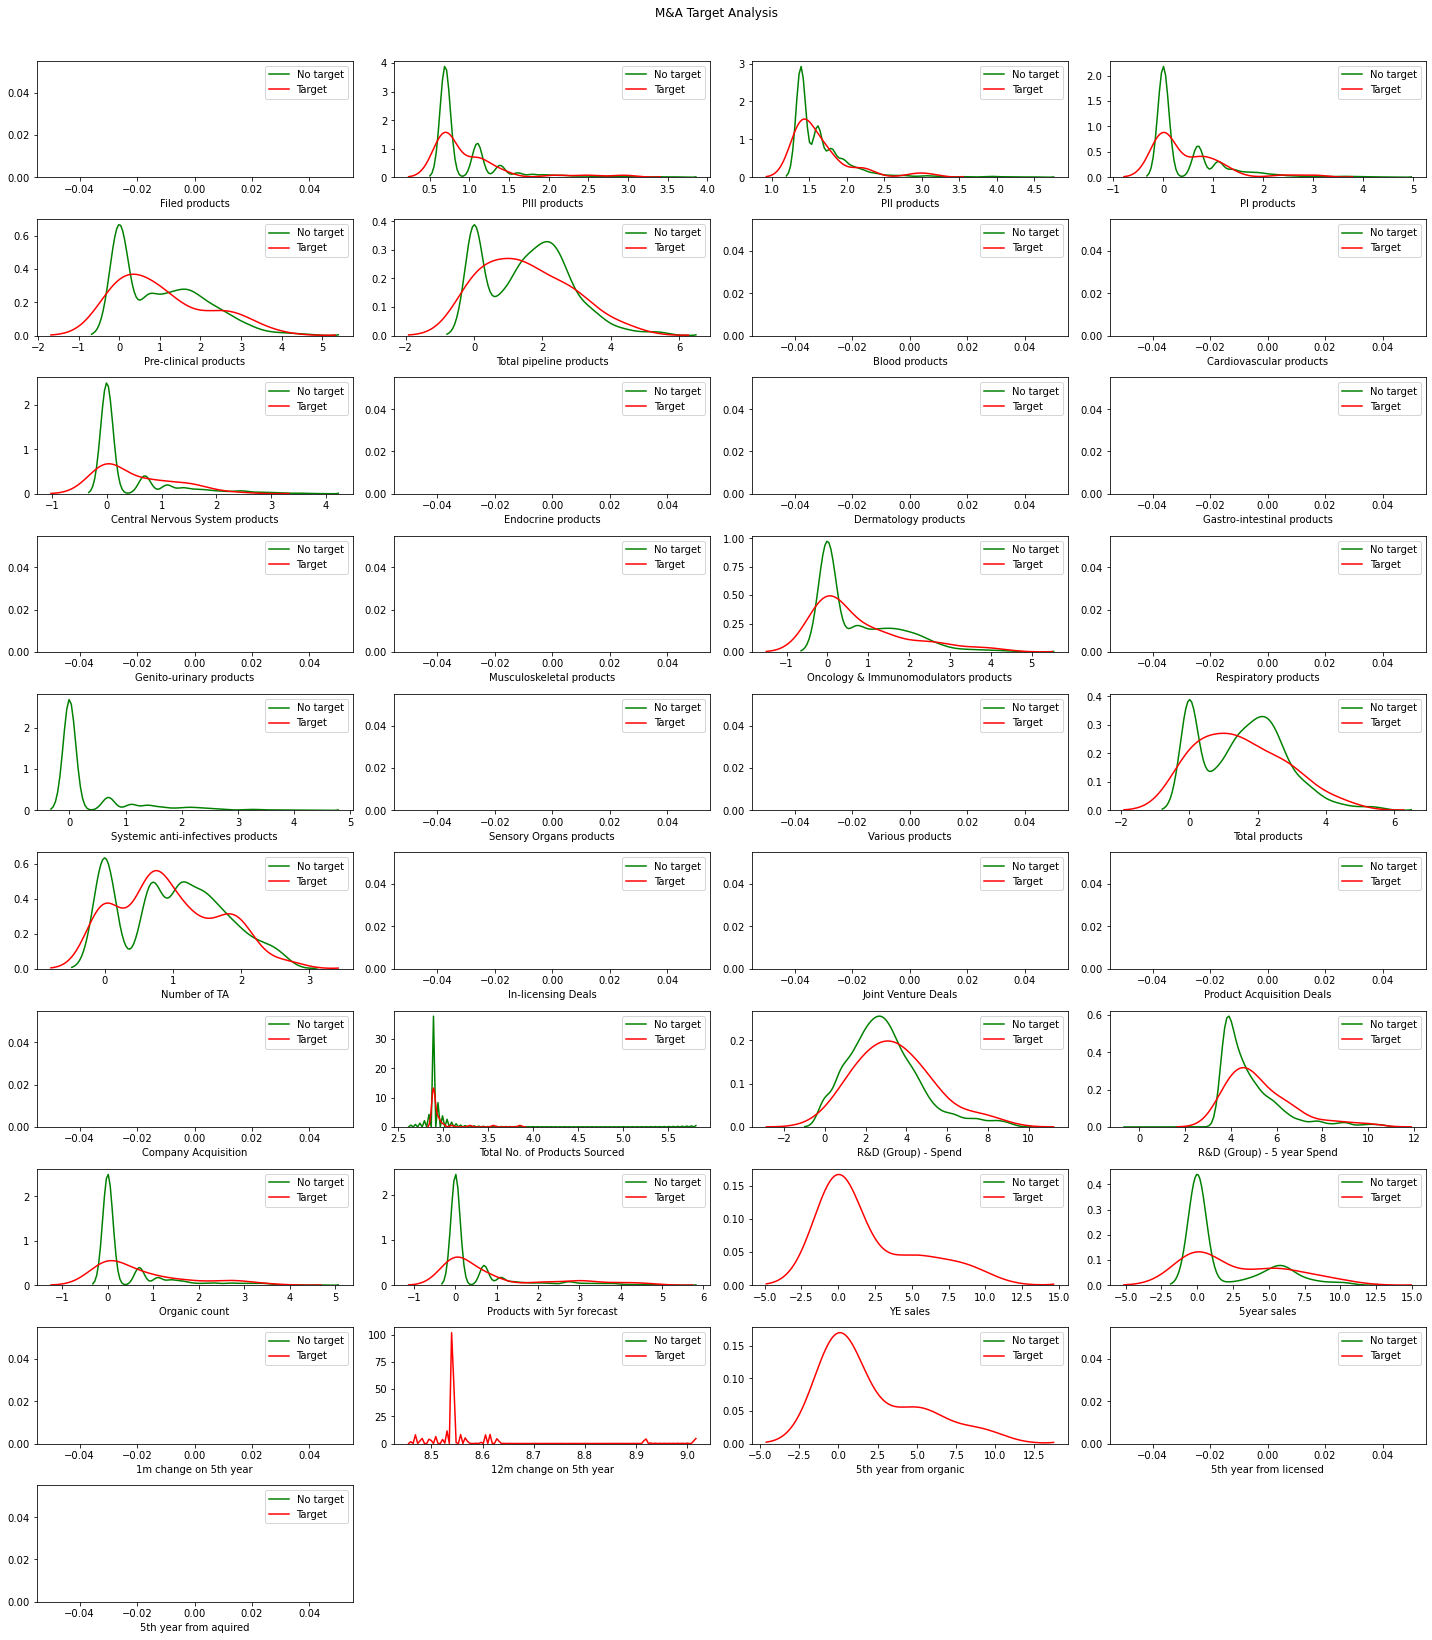

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize = (20, 25))
j = 0
for i in xtrain.columns:
    plt.subplot(11, 4, j+1)
    j += 1
    sns.distplot(pre2016[i][pre2016['Target']==0], color='g', label = 'No target',hist=False)
    sns.distplot(pre2016[i][pre2016['Target']==1], color='r', label = 'Target', hist = False)
    plt.legend(loc='best')
fig.suptitle('M&A Target Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

                                      Filed products  PIII products  \
Filed products                              1.000000       0.505685   
PIII products                               0.505685       1.000000   
PII products                                0.434176       0.706503   
PI products                                 0.423307       0.627211   
Pre-clinical products                       0.292662       0.479396   
Total pipeline products                     0.475477       0.640193   
Blood products                              0.341860       0.494150   
Cardiovascular products                     0.494364       0.532739   
Central Nervous System products             0.516716       0.520658   
Endocrine products                          0.412441       0.531143   
Dermatology products                        0.353985       0.379614   
Gastro-intestinal products                  0.429761       0.526747   
Genito-urinary products                     0.480571       0.481985   
Muscul

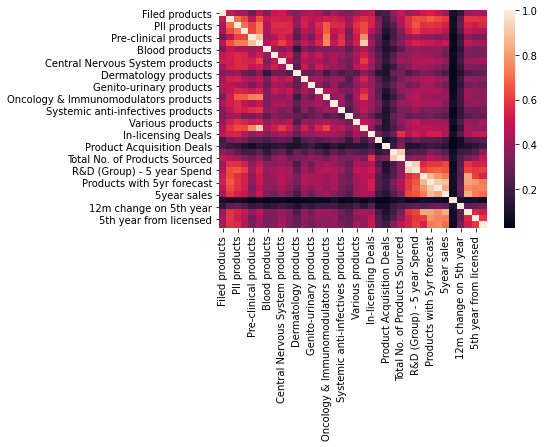

In [6]:
import seaborn as sns
corr = xtrain.corr()
sns.heatmap(corr)
print(corr)

In [ ]:
traindata = pre2016.iloc[:,2:]
sns.pairplot(traindata, hue="Target?")

In [15]:
# functions needed for pr_auc_score()
from sklearn.metrics import auc, precision_recall_curve

# sampler objects
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler

# Classification models to compare
from sklearn.linear_model import LogisticRegression

#with SMOTE
os = SMOTE(random_state=0, sampling_strategy=0.1)
columns = xtrain.columns
os_data_X,os_data_y=os.fit_sample(xtrain, ytrain)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Target'])
print("length of SMOTE data is ",len(os_data_X))
print("Number of no target in SMOTE data",len(os_data_y[os_data_y['Target']==0]))
print("Number of target",len(os_data_y[os_data_y['Target']==1]))
print("Proportion of no target data in SMOTE data is ",len(os_data_y[os_data_y['Target']==0])/len(os_data_X))
print("Proportion of target data in SMOTE data is ",len(os_data_y[os_data_y['Target']==1])/len(os_data_X))


#with SMOTE2
os = SMOTE(random_state=0)
columns = xtrain.columns
os_data_X3,os_data_y3=os.fit_sample(xtrain, ytrain)
os_data_X3 = pd.DataFrame(data=os_data_X3,columns=columns )
os_data_y3= pd.DataFrame(data=os_data_y3,columns=['Target'])
print("length of SMOTE data is ",len(os_data_X))
print("Number of no target in SMOTE data",len(os_data_y3[os_data_y3['Target']==0]))
print("Number of target",len(os_data_y3[os_data_y3['Target']==1]))
print("Proportion of no target data in SMOTE data is ",len(os_data_y3[os_data_y3['Target']==0])/len(os_data_X3))
print("Proportion of target data in SMOTE data is ",len(os_data_y3[os_data_y3['Target']==1])/len(os_data_X3))

#random oversampling
os1 = RandomOverSampler(random_state=0)
os1_data_X,os1_data_y=os1.fit_sample(xtrain, ytrain)
os1_data_X = pd.DataFrame(data=os1_data_X,columns=columns )
os1_data_y= pd.DataFrame(data=os1_data_y,columns=['Target'])
print("length of oversampled data is ",len(os1_data_X))
print("Number of no target in oversampled data",len(os1_data_y[os1_data_y['Target']==0]))
print("Number of target",len(os1_data_y[os1_data_y['Target']==1]))
print("Proportion of no target data in oversampled data is ",len(os1_data_y[os1_data_y['Target']==0])/len(os1_data_X))
print("Proportion of target data in oversampled data is ",len(os1_data_y[os1_data_y['Target']==1])/len(os1_data_X))

#random undersampling
us = RandomUnderSampler(random_state=0,sampling_strategy ='not minority')
us_data_X,us_data_y=us.fit_sample(xtrain, ytrain)
us_data_X = pd.DataFrame(data=us_data_X,columns=columns )
us_data_y= pd.DataFrame(data=us_data_y,columns=['Target'])
print("length of oversampled data is ",len(us_data_X))
print("Number of no target in undersampled data",len(us_data_y[us_data_y['Target']==0]))
print("Number of target",len(us_data_y[us_data_y['Target']==1]))
print("Proportion of no target data in undersampled data is ",len(us_data_y[us_data_y['Target']==0])/len(us_data_X))
print("Proportion of target data in undersampled data is ",len(us_data_y[us_data_y['Target']==1])/len(us_data_X))

#ADASYN
os2 = ADASYN(random_state=0)
os2_data_X,os2_data_y=os2.fit_sample(xtrain, ytrain)
os2_data_X = pd.DataFrame(data=os2_data_X,columns=columns )
os2_data_y= pd.DataFrame(data=os2_data_y,columns=['Target'])
print("length of ADASYN data is ",len(os2_data_X))
print("Number of no target in ADASYN data",len(os2_data_y[os2_data_y['Target']==0]))
print("Number of target",len(os2_data_y[os2_data_y['Target']==1]))
print("Proportion of no target data in ADASYN data is ",len(os2_data_y[os2_data_y['Target']==0])/len(os2_data_X))
print("Proportion of target data in ADASYN data is ",len(os2_data_y[os2_data_y['Target']==1])/len(os2_data_X))


#random under, random over - even
from imblearn.pipeline import Pipeline
over = RandomOverSampler(random_state=0)
under = RandomUnderSampler(sampling_strategy=0.66,random_state=0)
pipeline = Pipeline(steps=[('u', under),('o', over)])
UOX,UOy = pipeline.fit_resample(xtrain,ytrain)
UOX = pd.DataFrame(data=UOX,columns=columns )
UOy= pd.DataFrame(data=UOy,columns=['Target'])
print("length of under over data is ",len(UOX))
print("Number of no target in under over data",len(UOy[UOy['Target']==0]))
print("Number of target",len(UOy[UOy['Target']==1]))
print("Proportion of no target data in under over data is ",len(UOy[UOy['Target']==0])/len(UOX))
print("Proportion of target data in under over data is ",len(UOy[UOy['Target']==1])/len(UOX))

#random under, random over - uneven
from imblearn.pipeline import Pipeline
over = RandomOverSampler(sampling_strategy=0.1,random_state=0)
under = RandomUnderSampler(sampling_strategy=0.5,random_state=0)
pipeline = Pipeline(steps=[('o', over),('u', under)])
UOX2,UOy2 = pipeline.fit_resample(xtrain,ytrain)
UOX2 = pd.DataFrame(data=UOX2,columns=columns )
UOy2= pd.DataFrame(data=UOy2,columns=['Target'])
print("length of under over data2 is ",len(UOX2))
print("Number of no target in under over data2",len(UOy2[UOy2['Target']==0]))
print("Number of target",len(UOy2[UOy2['Target']==1]))
print("Proportion of no target data in under over data2 is ",len(UOy2[UOy2['Target']==0])/len(UOX2))
print("Proportion of target data in under over data2 is ",len(UOy2[UOy2['Target']==1])/len(UOX2))

length of SMOTE data is  3281
Number of no target in SMOTE data 2983
Number of target 298
Proportion of no target data in SMOTE data is  0.9091740323072234
Proportion of target data in SMOTE data is  0.0908259676927766
length of SMOTE data is  3281
Number of no target in SMOTE data 2983
Number of target 2983
Proportion of no target data in SMOTE data is  0.5
Proportion of target data in SMOTE data is  0.5
length of oversampled data is  5966
Number of no target in oversampled data 2983
Number of target 2983
Proportion of no target data in oversampled data is  0.5
Proportion of target data in oversampled data is  0.5
length of oversampled data is  76
Number of no target in undersampled data 38
Number of target 38
Proportion of no target data in undersampled data is  0.5
Proportion of target data in undersampled data is  0.5
length of ADASYN data is  5971
Number of no target in ADASYN data 2983
Number of target 2988
Proportion of no target data in ADASYN data is  0.499581309663373
Proport

In [54]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
##MODEL RAW DATA
#dummy model
model = DummyClassifier(strategy='stratified')
model.fit(xtrain, ytrain)
yhat = model.predict_proba(xtest)
ypred = model.predict(xtest)
naive_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(ytest, naive_probs)
auc_score = auc(recall, precision)
ypred = model.predict(xtest)
f1score = precision_recall_fscore_support(ytest,ypred,average='binary',pos_label=1)
print('RAW - No Skill PR AUC: %.3f' % auc_score)
print('RAW - No Skill f1f',  f1score)
model.fit(os_data_X, os_data_y.values.ravel())
yhat = model.predict_proba(xtest)
naive_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(ytest, naive_probs)
auc_score = auc(recall, precision)
print('Smote - No Skill PR AUC: %.3f' % auc_score)
ypred = model.predict(xtest)
f1score = precision_recall_fscore_support(ytest,ypred,average='binary',pos_label=1)
print('smote - No Skill f1:',f1score)
model.fit(os_data_X3, os_data_y3.values.ravel())
yhat = model.predict_proba(xtest)
naive_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(ytest, naive_probs)
auc_score = auc(recall, precision)
print('smote2 - No Skill PR AUC: %.3f' % auc_score)
ypred = model.predict(xtest)
f1score = precision_recall_fscore_support(ytest,ypred,average='binary',pos_label=1)
print('smote2 - No Skill f1',f1score)
model.fit(os2_data_X, os2_data_y.values.ravel())
yhat = model.predict_proba(xtest)
naive_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(ytest, naive_probs)
auc_score = auc(recall, precision)
print('ADASYN - No Skill PR AUC: %.3f' % auc_score)
ypred = model.predict(xtest)
f1score = precision_recall_fscore_support(ytest,ypred,average='binary',pos_label=1)
print('ADASYN - No Skill f1', f1score)

model.fit(us_data_X, us_data_y.values.ravel())
yhat = model.predict_proba(xtest)
naive_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(ytest, naive_probs)
auc_score = auc(recall, precision)
print('Random under - No Skill PR AUC: %.3f' % auc_score)
ypred = model.predict(xtest)
f1score = precision_recall_fscore_support(ytest,ypred,average='binary',pos_label=1)
print('RU - No Skill f1', f1score)
model.fit(UOX, UOy.values.ravel())
yhat = model.predict_proba(xtest)
naive_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(ytest, naive_probs)
auc_score = auc(recall, precision)
print('under over even - No Skill PR AUC: %.3f' % auc_score)
ypred = model.predict(xtest)
f1score = precision_recall_fscore_support(ytest,ypred,average='binary',pos_label=1)
print('UO even - No Skill f1:', f1score)
model.fit(UOX2, UOy2.values.ravel())
yhat = model.predict_proba(xtest)
naive_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(ytest, naive_probs)
auc_score = auc(recall, precision)
print('under over uneven - No Skill PR AUC: %.3f' % auc_score)
ypred = model.predict(xtest)
f1score = precision_recall_fscore_support(ytest,ypred,average='binary',pos_label=1)
print('UO odd - No Skill',f1score)

RAW - No Skill PR AUC: 0.008
RAW - No Skill f1f (0.11764705882352941, 0.1111111111111111, 0.11428571428571428, None)
Smote - No Skill PR AUC: 0.074
smote - No Skill f1: (0.02727272727272727, 0.16666666666666666, 0.046875, None)
smote2 - No Skill PR AUC: 0.234
smote2 - No Skill f1 (0.017045454545454544, 0.5, 0.03296703296703296, None)
ADASYN - No Skill PR AUC: 0.206
ADASYN - No Skill f1 (0.017793594306049824, 0.5555555555555556, 0.034482758620689655, None)
Random under - No Skill PR AUC: 0.206
RU - No Skill f1 (0.012612612612612612, 0.3888888888888889, 0.024432809773123912, None)
under over even - No Skill PR AUC: 0.291
UO even - No Skill f1: (0.014314928425357873, 0.3888888888888889, 0.027613412228796846, None)
under over uneven - No Skill PR AUC: 0.180
UO odd - No Skill (0.024096385542168676, 0.4444444444444444, 0.045714285714285714, None)


In [92]:
print(pre2016.columns)

Index(['Year', 'Company', 'Filed products', 'PIII products', 'PII products',
       'PI products', 'Pre-clinical products', 'Total pipeline products',
       'Blood products', 'Cardiovascular products',
       'Central Nervous System products', 'Endocrine products',
       'Dermatology products', 'Gastro-intestinal products',
       'Genito-urinary products', 'Musculoskeletal products',
       'Oncology & Immunomodulators products', 'Respiratory products',
       'Systemic anti-infectives products', 'Sensory Organs products',
       'Various products', 'Total products', 'Number of TA',
       'In-licensing Deals', 'Joint Venture Deals',
       'Product Acquisition Deals', 'Company Acquisition',
       'Total No. of Products Sourced', 'R&D (Group) - Spend',
       'R&D (Group) - 5 year Spend', 'Organic count',
       'Products with 5yr forecast', 'YE sales', '5year sales',
       '1m change on 5th year', '12m change on 5th year',
       '5th year from organic', '5th year from licensed',

In [95]:
from scipy import stats
ttestset = pre2016.iloc[:,2:]
ttestset.columns = ['Filed products', 'PIII products', 'PII products',
       'PI products', 'Pre-clinical products', 'Total pipeline products',
       'Blood products', 'Cardiovascular products',
       'Central Nervous System products', 'Endocrine products',
       'Dermatology products', 'Gastro-intestinal products',
       'Genito-urinary products', 'Musculoskeletal products',
       'Oncology & Immunomodulators products', 'Respiratory products',
       'Systemic anti-infectives products', 'Sensory Organs products',
       'Various products', 'Total products', 'Number of TA',
       'In-licensing Deals', 'Joint Venture Deals',
       'Product Acquisition Deals', 'Company Acquisition',
       'Total No. of Products Sourced', 'R&D (Group) - Spend',
       'R&D (Group) - 5 year Spend', 'Organic count',
       'Products with 5yr forecast', 'YE sales', '5year sales',
       '1m change on 5th year', '12m change on 5th year',
       '5th year from organic', '5th year from licensed',
       '5th year from aquired','Target']

trainpos = ttestset.query('Target ==1')
trainneg = ttestset.query('Target ==0')

tres = stats.ttest_ind(trainpos,trainneg)

print(tres)

Ttest_indResult(statistic=array([-0.27415157,  0.31196591, -0.13890956, -0.25885932, -0.12665568,
       -0.38824681,  1.10027182, -0.88430751,  0.7330768 , -0.58171787,
        0.82168269, -1.85010968, -0.7045688 , -0.40605645, -0.11699347,
       -0.26990502, -0.83574471, -0.62750248, -0.54238867, -0.38824681,
       -0.47530111, -0.16658609,  1.64570558,  2.33018662, -0.22787591,
        0.23419831,  1.80424444,  1.85424034,  1.86429887,  2.10379112,
        1.97999615,  1.86948148,  0.58981678, -0.11064201,  1.89144082,
        1.18216924,  1.83774581,         inf]), pvalue=array([0.7839869 , 0.75508797, 0.88953089, 0.79576144, 0.89922136,
       0.69786077, 0.27130143, 0.37660065, 0.46356851, 0.56080016,
       0.4113224 , 0.06439539, 0.48113297, 0.6847299 , 0.90687301,
       0.78725177, 0.40336468, 0.53037737, 0.58759082, 0.69786077,
       0.63460675, 0.86770689, 0.09992848, 0.01986187, 0.81975814,
       0.81484691, 0.07129262, 0.06380224, 0.06237673, 0.03547918,
       0.0477

In [10]:

import statsmodels.api as sm
logit_model=sm.Logit(UOy2.values.ravel(),UOX2)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.487436
         Iterations 8
                                     Results: Logit
Model:                       Logit                   Pseudo R-squared:        0.234     
Dependent Variable:          y                       AIC:                     943.5364  
Date:                        2021-03-12 07:07        BIC:                     1116.1818 
No. Observations:            894                     Log-Likelihood:          -435.77   
Df Model:                    35                      LL-Null:                 -569.04   
Df Residuals:                858                     LLR p-value:             2.0036e-37
Converged:                   1.0000                  Scale:                   1.0000    
No. Iterations:              8.0000                                                     
----------------------------------------------------------------------------------------
                                      Coef.  

In [16]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import auc
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score

# fit a model
# calculate F1 score
weights = {0:28.0, 1:1958.0}
model = LogisticRegression(solver='lbfgs',max_iter=5000,class_weight = 'balanced')
model.fit(xtrain, ytrain.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
#crossval_scores = cross_val_score(model, xtest, ytest, scoring='roc_auc', cv=10)
lr_precision, lr_recall, _ = precision_recall_curve(ytest, lr_probs)
lr_f1, lr_auc = f1_score(ytest, yhat), auc(lr_recall, lr_precision)
print('RAW',precision_recall_fscore_support(ytest,yhat,average='binary',pos_label=1))


#MODEL SMOTE DATA

model.fit(os_data_X, os_data_y.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
print(yhat)
lr1_precision, lr1_recall, _ = precision_recall_curve(ytest, lr_probs)
lr1_f1, lr1_auc = f1_score(ytest, yhat), auc(lr1_recall, lr1_precision)
print('smote', precision_recall_fscore_support(ytest,yhat,average='binary',pos_label=1))

#randomoversample

model.fit(os1_data_X, os1_data_y.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr2_precision, lr2_recall, _ = precision_recall_curve(ytest, lr_probs)
lr2_f1, lr2_auc = f1_score(ytest, yhat), auc(lr2_recall, lr2_precision)


#ADASYN

model.fit(os2_data_X, os2_data_y.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr3_precision, lr3_recall, _ = precision_recall_curve(ytest, lr_probs)
lr3_f1, lr3_auc = f1_score(ytest, yhat), auc(lr3_recall, lr3_precision)
print('adasyn',precision_recall_fscore_support(ytest,yhat,average='binary',pos_label=1))

#random undersample
model = LogisticRegression(max_iter=5000)
model.fit(us_data_X, us_data_y.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr4_precision, lr4_recall, _ = precision_recall_curve(ytest, lr_probs)
lr4_f1, lr4_auc = f1_score(ytest, yhat), auc(lr4_recall, lr4_precision)

#random over random under 
#random under, random over - even
model = LogisticRegression(max_iter=5000)
model.fit(UOX,UOy.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr5_precision, lr5_recall, _ = precision_recall_curve(ytest, lr_probs)
lr5_f1, lr5_auc = f1_score(ytest, yhat), auc(lr5_recall, lr5_precision)
print('ou',precision_recall_fscore_support(ytest,yhat,average='binary',pos_label=1))

#random under, random over - ueven

model.fit(UOX2,UOy2.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr6_precision, lr6_recall, _ = precision_recall_curve(ytest, lr_probs)
lr6_f1, lr6_auc = f1_score(ytest, yhat), auc(lr6_recall, lr6_precision)
print('ou2',precision_recall_fscore_support(ytest,yhat,average='binary',pos_label=1))

RAW (0.030303030303030304, 0.3333333333333333, 0.05555555555555555, None)
[1 0 1 ... 0 1 0]
smote (0.025, 0.3333333333333333, 0.046511627906976744, None)
adasyn (0.020887728459530026, 0.4444444444444444, 0.03990024937655861, None)
ou (0.0219435736677116, 0.3888888888888889, 0.04154302670623145, None)
ou2 (0.025210084033613446, 0.16666666666666666, 0.043795620437956206, None)


In [17]:
print('Raw: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
print('SMOTE: f1=%.3f auc=%.3f' % (lr1_f1, lr1_auc))
print('Random Oversample: f1=%.3f auc=%.3f' % (lr2_f1, lr2_auc))
print('ADASYN: f1=%.3f auc=%.3f' % (lr3_f1, lr3_auc))
print('Random Undersample: f1=%.3f auc=%.3f' % (lr4_f1, lr4_auc))
print('overunder -even: f1=%.3f auc=%.3f' % (lr5_f1, lr5_auc))
print('overunder -uneven: f1=%.3f auc=%.3f' % (lr6_f1, lr6_auc))


Raw: f1=0.056 auc=0.021
SMOTE: f1=0.047 auc=0.022
Random Oversample: f1=0.039 auc=0.020
ADASYN: f1=0.040 auc=0.022
Random Undersample: f1=0.058 auc=0.020
overunder -even: f1=0.042 auc=0.019
overunder -uneven: f1=0.044 auc=0.020


In [97]:
import statsmodels.api as sm
logit_model=sm.Logit(ytrain.values.ravel(), xtrain)
result=logit_model.fit(maxiter=5000)
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.061308
         Iterations 11


LinAlgError: Singular matrix

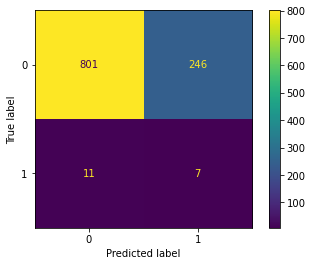

In [22]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
##MODEL RAW DATA
# fit a model
# calculate F1 score

weights = {0:33.0, 1:2466.0}
model = LogisticRegression(solver='lbfgs',max_iter=5000,class_weight = 'balanced')
model.fit(UOX, UOy.values.ravel())
# predict probabilities
dsp = plot_confusion_matrix(model,xtest,ytest)
plt.show()
#lr_probs = pd.DataFrame(model.predict_proba(xtest))
#guesses = pd.DataFrame(model.predict(xtest))
#outputs = pd.concat([ytest,guesses,lr_probs], axis =1)
#pd.set_option('display.max_rows', 2000)
#print(outputs)
#print(ytest)

In [37]:
from sklearn.tree import DecisionTreeClassifier

##MODEL RAW DATA
# fit a model
# calculate F1 score

model = DecisionTreeClassifier(criterion = 'gini')
model.fit(xtrain, ytrain)
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr_precision, lr_recall, _ = precision_recall_curve(ytest, lr_probs)
lr_f1, lr_auc = f1_score(ytest, yhat), auc(lr_recall, lr_precision)
print('raw',precision_recall_fscore_support(ytest,yhat,average='binary',pos_label=1))

#
#MODEL SMOTE DATA
model.fit(os_data_X, os_data_y)
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr1_precision, lr1_recall, _ = precision_recall_curve(ytest, lr_probs)
lr1_f1, lr1_auc = f1_score(ytest, yhat), auc(lr1_recall, lr1_precision)
print('smote',precision_recall_fscore_support(ytest,yhat,average='binary',pos_label=1))
# summarize scores

#randomoversample
model.fit(os1_data_X, os1_data_y)
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr2_precision, lr2_recall, _ = precision_recall_curve(ytest, lr_probs)
lr2_f1, lr2_auc = f1_score(ytest, yhat), auc(lr2_recall, lr2_precision)


#ADASYN
model.fit(os2_data_X, os2_data_y)
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr3_precision, lr3_recall, _ = precision_recall_curve(ytest, lr_probs)
lr3_f1, lr3_auc = f1_score(ytest, yhat), auc(lr3_recall, lr3_precision)
print('adasyn',precision_recall_fscore_support(ytest,yhat,average='binary',pos_label=1))
#random undersample
model.fit(us_data_X, us_data_y)
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr4_precision, lr4_recall, _ = precision_recall_curve(ytest, lr_probs)
lr4_f1, lr4_auc = f1_score(ytest, yhat), auc(lr4_recall, lr4_precision)

#random over random under 
#random under, random over - even
model.fit(UOX,UOy)
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr5_precision, lr5_recall, _ = precision_recall_curve(ytest, lr_probs)
lr5_f1, lr5_auc = f1_score(ytest, yhat), auc(lr5_recall, lr5_precision)

#random under, random over - ueven
model.fit(UOX2,UOy2)
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr6_precision, lr6_recall, _ = precision_recall_curve(ytest, lr_probs)
lr6_f1, lr6_auc = f1_score(ytest, yhat), auc(lr6_recall, lr6_precision)
print('ou',precision_recall_fscore_support(ytest,yhat,average='binary',pos_label=1))

raw (0.011461318051575931, 0.2222222222222222, 0.021798365122615803, None)
smote (0.02459016393442623, 0.16666666666666666, 0.04285714285714285, None)
adasyn (0.0, 0.0, 0.0, None)
ou (0.016611295681063124, 0.5555555555555556, 0.03225806451612903, None)


In [25]:
print("SCORE FOR DECISION TREE MODELS")
print('Raw: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
print('SMOTE: f1=%.3f auc=%.3f' % (lr1_f1, lr1_auc))
print('Random Oversample: f1=%.3f auc=%.3f' % (lr2_f1, lr2_auc))
print('ADASYN: f1=%.3f auc=%.3f' % (lr3_f1, lr3_auc))
print('Random Undersample: f1=%.3f auc=%.3f' % (lr4_f1, lr4_auc))
print('Random under over even: f1=%.3f auc=%.3f' % (lr5_f1, lr5_auc))
print('Random under over uneven: f1=%.3f auc=%.3f' % (lr6_f1, lr6_auc))

SCORE FOR DECISION TREE MODELS
Raw: f1=0.023 auc=0.124
SMOTE: f1=0.041 auc=0.102
Random Oversample: f1=0.024 auc=0.124
ADASYN: f1=0.053 auc=0.061
Random Undersample: f1=0.035 auc=0.345
Random under over even: f1=0.033 auc=0.509
Random under over uneven: f1=0.036 auc=0.236


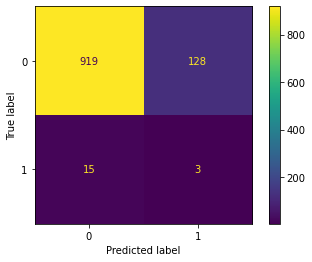

In [30]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
##MODEL RAW DATA
# fit a model
# calculate F1 score

model = DecisionTreeClassifier(criterion = 'gini')
model.fit(os_data_X, os_data_y) 
dsp = plot_confusion_matrix(model,xtest,ytest)
plt.show()

In [10]:
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import auc
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score

##MODEL RAW DATA
# fit a model
# calculate F1 score
weights = {0:33.0, 1:1866.0}
model = svm.SVC(kernel = 'sigmoid',probability=True, class_weight='balanced', random_state = 0)
model.fit(xtrain, ytrain.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr_precision, lr_recall, _ = precision_recall_curve(ytest, lr_probs)
lr_f1, lr_auc = f1_score(ytest, yhat), auc(lr_recall, lr_precision)
print('raw',precision_recall_fscore_support(ytest,yhat,average='binary',pos_label=1))
#
#MODEL SMOTE DATA
model.fit(os_data_X, os_data_y.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr1_precision, lr1_recall, _ = precision_recall_curve(ytest, lr_probs)
lr1_f1, lr1_auc = f1_score(ytest, yhat), auc(lr1_recall, lr1_precision)
print('smote',precision_recall_fscore_support(ytest,yhat,average='binary',pos_label=1))
# summarize scores

#randomoversample
model.fit(os1_data_X, os1_data_y.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr2_precision, lr2_recall, _ = precision_recall_curve(ytest, lr_probs)
lr2_f1, lr2_auc = f1_score(ytest, yhat), auc(lr2_recall, lr2_precision)

#ADASYN
model.fit(os2_data_X, os2_data_y.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr3_precision, lr3_recall, _ = precision_recall_curve(ytest, lr_probs)
lr3_f1, lr3_auc = f1_score(ytest, yhat), auc(lr3_recall, lr3_precision)
print('adasyn',precision_recall_fscore_support(ytest,yhat,average='binary',pos_label=1))

#random undersample
model.fit(us_data_X, us_data_y.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr4_precision, lr4_recall, _ = precision_recall_curve(ytest, lr_probs)
lr4_f1, lr4_auc = f1_score(ytest, yhat), auc(lr4_recall, lr4_precision)

#random over random under 
#random under, random over - even
model.fit(UOX,UOy.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr5_precision, lr5_recall, _ = precision_recall_curve(ytest, lr_probs)
lr5_f1, lr5_auc = f1_score(ytest, yhat), auc(lr5_recall, lr5_precision)

#random under, random over - ueven
model.fit(UOX2,UOy2.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr6_precision, lr6_recall, _ = precision_recall_curve(ytest, lr_probs)
lr6_f1, lr6_auc = f1_score(ytest, yhat), auc(lr6_recall, lr6_precision)
print('uo',precision_recall_fscore_support(ytest,yhat,average='binary',pos_label=1))

raw (0.016163793103448277, 0.8333333333333334, 0.03171247357293869, None)
smote (0.015486725663716814, 0.7777777777777778, 0.03036876355748373, None)
adasyn (0.015401540154015401, 0.7777777777777778, 0.030204962243797193, None)
uo (0.017708333333333333, 0.9444444444444444, 0.034764826175869123, None)


In [11]:
print("SCORE SVC MODELS")
print('Raw: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
print('SMOTE: f1=%.3f auc=%.3f' % (lr1_f1, lr1_auc))
print('Random Oversample: f1=%.3f auc=%.3f' % (lr2_f1, lr2_auc))
print('ADASYN: f1=%.3f auc=%.3f' % (lr3_f1, lr3_auc))
print('Random Undersample: f1=%.3f auc=%.3f' % (lr4_f1, lr4_auc))
print('Random under over even: f1=%.3f auc=%.3f' % (lr5_f1, lr5_auc))
print('Random under over uneven: f1=%.3f auc=%.3f' % (lr6_f1, lr6_auc))

SCORE SVC MODELS
Raw: f1=0.032 auc=0.017
SMOTE: f1=0.030 auc=0.016
Random Oversample: f1=0.032 auc=0.017
ADASYN: f1=0.030 auc=0.016
Random Undersample: f1=0.056 auc=0.014
Random under over even: f1=0.047 auc=0.022
Random under over uneven: f1=0.035 auc=0.016


In [11]:
#SVM feature coefficients - works for linear
from sklearn import svm
import matplotlib.pyplot as plt
def feature_plot(classifier, feature_names, top_features=4):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 plt.figure(figsize=(18, 7))
 colors = ['green' if c < 0 else 'blue' for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 plt.xticks(np.arange(1 + 2 * top_features), feature_names[top_coefficients], rotation=45, ha='right')
 plt.show()


model = svm.SVC(kernel = 'sigmoid',probability=True, class_weight='balanced', random_state = 0)
model.fit(xtrain, ytrain.values.ravel())
feature_plot(model,xtrain.columns.values)

AttributeError: coef_ is only available when using a linear kernel

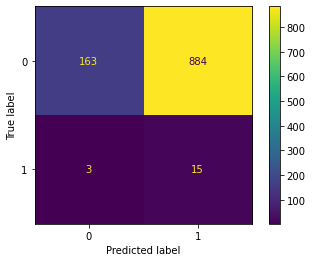

In [47]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
##MODEL RAW DATA
# fit a model
# calculate F1 score
weights = {0:33.0, 1:1866.0}
model = svm.SVC(kernel = 'sigmoid',probability=True, class_weight='balanced', random_state = 0)
model.fit(os_data_X, os_data_y.values.ravel())
dsp = plot_confusion_matrix(model,xtest,ytest)
plt.show()

In [55]:
import wittgenstein as lw
from sklearn.model_selection import GridSearchCV
model = lw.RIPPER(prune_size =0.01, k =10, random_state=42)
model.fit(xtrain, ytrain, require_min_samples=False)
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr_precision, lr_recall, _ = precision_recall_curve(ytest, lr_probs)
lr_f1, lr_auc = f1_score(ytest, yhat), auc(lr_recall, lr_precision)
print('raw',precision_recall_fscore_support(ytest,yhat,average='binary',pos_label=1))
#
#MODEL SMOTE DATA
model.fit(os_data_X, os_data_y, require_min_samples=False)
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr1_precision, lr1_recall, _ = precision_recall_curve(ytest, lr_probs)
lr1_f1, lr1_auc = f1_score(ytest, yhat), auc(lr1_recall, lr1_precision)
print('smote',precision_recall_fscore_support(ytest,yhat,average='binary',pos_label=1))
# summarize scores

#randomoversample
model.fit(os1_data_X, os1_data_y, require_min_samples=False)
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr2_precision, lr2_recall, _ = precision_recall_curve(ytest, lr_probs)
lr2_f1, lr2_auc = f1_score(ytest, yhat), auc(lr2_recall, lr2_precision)


#ADASYN
model.fit(os2_data_X, os2_data_y, require_min_samples=False)
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr3_precision, lr3_recall, _ = precision_recall_curve(ytest, lr_probs)
lr3_f1, lr3_auc = f1_score(ytest, yhat), auc(lr3_recall, lr3_precision)
print('adasyn',precision_recall_fscore_support(ytest,yhat,average='binary',pos_label=1))

#random undersample
model.fit(us_data_X, us_data_y, require_min_samples=False)
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr4_precision, lr4_recall, _ = precision_recall_curve(ytest, lr_probs)
lr4_f1, lr4_auc = f1_score(ytest, yhat), auc(lr4_recall, lr4_precision)

#random under, random over - even

model.fit(UOX,UOy.values.ravel(), require_min_samples=False)
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr5_precision, lr5_recall, _ = precision_recall_curve(ytest, lr_probs)
lr5_f1, lr5_auc = f1_score(ytest, yhat), auc(lr5_recall, lr5_precision)

#random under, random over - ueven

model.fit(UOX2,UOy2.values.ravel(), require_min_samples=False)
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr6_precision, lr6_recall, _ = precision_recall_curve(ytest, lr_probs)
lr6_f1, lr6_auc = f1_score(ytest, yhat), auc(lr6_recall, lr6_precision)
print('uo',precision_recall_fscore_support(ytest,yhat,average='binary',pos_label=1))

C:\Users\EdwinE\AppData\Local\Continuum\anaconda3\envs\myen\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


raw (0.0, 0.0, 0.0, None)
smote (0.018018018018018018, 0.1111111111111111, 0.031007751937984496, None)
adasyn (0.022222222222222223, 0.05555555555555555, 0.031746031746031744, None)
uo (0.019813519813519812, 0.9444444444444444, 0.038812785388127845, None)


In [68]:
print("SCORE RIPPER MODELS")
print('Raw: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
print('SMOTE: f1=%.3f auc=%.3f' % (lr1_f1, lr1_auc))
print('Random Oversample: f1=%.3f auc=%.3f' % (lr2_f1, lr2_auc))
print('ADASYN: f1=%.3f auc=%.3f' % (lr3_f1, lr3_auc))
print('Random Undersample: f1=%.3f auc=%.3f' % (lr4_f1, lr4_auc))
print('Random under over even: f1=%.3f auc=%.3f' % (lr5_f1, lr5_auc))
print('Random under over uneven: f1=%.3f auc=%.3f' % (lr6_f1, lr6_auc))

SCORE RIPPER MODELS
Raw: f1=0.000 auc=0.508
SMOTE: f1=0.031 auc=0.017
Random Oversample: f1=0.000 auc=0.008
ADASYN: f1=0.032 auc=0.020
Random Undersample: f1=0.037 auc=0.128
Random under over even: f1=0.017 auc=0.041
Random under over uneven: f1=0.039 auc=0.069


Random under over even: f1=0.017 auc=0.041
[[CentralNervousSystemproducts=0.18-0.41 ^ PIIproducts=0.07-0.13 ^ 5thyearfromorganic=0.0-0.51]]
None


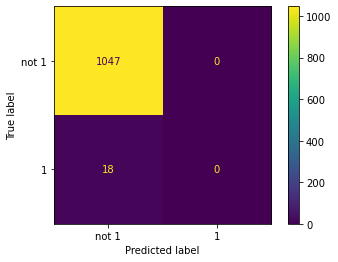

In [67]:
import wittgenstein as lw
model = lw.RIPPER(prune_size =0.01, k =10, random_state=42)
model.fit(xtrain, ytrain, require_min_samples=False)
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr_precision, lr_recall, _ = precision_recall_curve(ytest, lr_probs)
lr_f1, lr_auc = f1_score(ytest, yhat), auc(lr_recall, lr_precision)
print('Random under over even: f1=%.3f auc=%.3f' % (lr5_f1, lr5_auc))
print(model.ruleset_.out_pretty())
from sklearn.metrics import plot_confusion_matrix
dsp = plot_confusion_matrix(model,xtest,ytest)
plt.show()

In [28]:
import wittgenstein as lw
model = lw.RIPPER(k=10, prune_size=0.01,random_state=0)
model.fit(pre2016.iloc[:,2:], require_min_samples=False,class_feat='Target?')
# predict probabilities
model.recalibrate_proba(only2016.iloc[:,2:],min_samples=None, require_min_samples=False)
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr_precision, lr_recall, _ = precision_recall_curve(ytest, lr_probs)
lr_f1, lr_auc = f1_score(ytest, yhat), auc(lr_recall, lr_precision)
print(model.ruleset_.out_pretty())
from sklearn.metrics import plot_confusion_matrix
dsp = plot_confusion_matrix(model,xtest,ytest)
plt.show()
print('SMOTE: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

IndexError: Dataset does not include class feature name Target?. Training set features: Index(['Filed products', 'PIII products', 'PII products', 'PI products',
       'Pre-clinical products', 'Research Project products', 'Total products',
       'Blood products', 'Cardiovascular products',
       'Central Nervous System products', 'Endocrine products',
       'Dermatology products', 'Gastro-intestinal products',
       'Genito-urinary products', 'Musculoskeletal products',
       'Oncology & Immunomodulators products', 'Respiratory products',
       'Systemic anti-infectives products', 'Sensory Organs products',
       'Various products', 'Total products.1', 'In-licensing Deals',
       'Joint Venture Deals', 'Out-licensed Technology Deals',
       'Product Acquisition Deals', 'Company Acquisition',
       'Total No. of Products Sourced', 'R&D (Group) - Spend',
       'R&D (Group) - 5 year Spend', 'No. of Employees', 'Organic count',
       'Products with 5yr forecast', 'YE sales', '5year sales',
       '1m change on 5th year', '12m change on 5th year',
       '5th year from organic', '5th year from licensed',
       '5th year from aquired', 'Target'],
      dtype='object')

In [66]:
print("SCORE RIPPER MODELS")
print('Raw: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

SCORE RIPPER MODELS
Raw: f1=0.000 auc=0.513


In [47]:
from keras.models import Sequential
from keras.layers import Dense
import keras.metrics as mt
from keras.callbacks import EarlyStopping
early_stopping =EarlyStopping(monitor='val_loss', patience=5)
model = Sequential()
model.add(Dense(80, input_dim=39, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[mt.AUC(curve="PR")])
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[mt.Recall()])

Using TensorFlow backend.
C:\Users\EdwinE\AppData\Local\Continuum\anaconda3\envs\myen\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\EdwinE\AppData\Local\Continuum\anaconda3\envs\myen\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\EdwinE\AppData\Local\Continuum\anaconda3\envs\myen\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([(

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [32]:
model.fit(xtrain, ytrain, epochs=150, batch_size=10)
from sklearn.metrics import confusion_matrix
predictions = model.predict_classes(xtest)
cm = confusion_matrix(y_true=ytest, y_pred=predictions)
print(cm)


Epoch 1/150
2460/2460 [==============================] - 0s 191us/step - loss: 11.8213 - auc_2: 0.0102
Epoch 2/150
2460/2460 [==============================] - 0s 92us/step - loss: 8.3812 - auc_2: 0.0163
Epoch 3/150
2460/2460 [==============================] - 0s 89us/step - loss: 5.3194 - auc_2: 0.0115
Epoch 4/150
2460/2460 [==============================] - 0s 87us/step - loss: 7.2733 - auc_2: 0.0150
Epoch 5/150
2460/2460 [==============================] - 0s 84us/step - loss: 7.6941 - auc_2: 0.0185
Epoch 6/150
2460/2460 [==============================] - 0s 83us/step - loss: 4.5209 - auc_2: 0.0103
Epoch 7/150
2460/2460 [==============================] - 0s 85us/step - loss: 3.6973 - auc_2: 0.0123
Epoch 8/150
2460/2460 [==============================] - 0s 83us/step - loss: 2.3305 - auc_2: 0.0284 ETA: 0s - loss: 3.0956 - auc_2: 0.0
Epoch 9/150
2460/2460 [==============================] - 0s 87us/step - loss: 4.0895 - auc_2: 0.0154
Epoch 10/150
2460/2460 [============================

In [35]:
model.fit(os_data_X, os_data_y, epochs=150, batch_size=10)
predictions = model.predict_classes(xtest)
cm = confusion_matrix(y_true=ytest, y_pred=predictions)
print(cm)

Epoch 1/150
2192/2192 [==============================] - 0s 110us/step - loss: 1.4796 - auc_2: 0.6947
Epoch 2/150
2192/2192 [==============================] - 0s 100us/step - loss: 1.3422 - auc_2: 0.6890
Epoch 3/150
2192/2192 [==============================] - 0s 91us/step - loss: 1.1351 - auc_2: 0.6976
Epoch 4/150
2192/2192 [==============================] - 0s 98us/step - loss: 1.0130 - auc_2: 0.7527
Epoch 5/150
2192/2192 [==============================] - 0s 90us/step - loss: 0.8711 - auc_2: 0.7852
Epoch 6/150
2192/2192 [==============================] - 0s 105us/step - loss: 0.8637 - auc_2: 0.7475
Epoch 7/150
2192/2192 [==============================] - 0s 101us/step - loss: 0.7715 - auc_2: 0.7505
Epoch 8/150
2192/2192 [==============================] - 0s 104us/step - loss: 0.6541 - auc_2: 0.8065
Epoch 9/150
2192/2192 [==============================] - 0s 101us/step - loss: 0.6427 - auc_2: 0.7938
Epoch 10/150
2192/2192 [==============================] - 0s 85us/step - loss: 0.5900

In [141]:
model.fit(os1_data_X, os1_data_y, epochs=150, batch_size=10)
predictions = model.predict_classes(xtest)
cm = confusion_matrix(y_true=ytest, y_pred=predictions)
print(cm)

Epoch 1/150
2082/2082 [==============================] - 0s 125us/step - loss: 0.2120 - auc_1: 0.9579
Epoch 2/150
2082/2082 [==============================] - 0s 97us/step - loss: 0.1802 - auc_1: 0.9630
Epoch 3/150
2082/2082 [==============================] - 0s 92us/step - loss: 0.2494 - auc_1: 0.9513
Epoch 4/150
2082/2082 [==============================] - 0s 94us/step - loss: 0.2267 - auc_1: 0.9482
Epoch 5/150
2082/2082 [==============================] - 0s 102us/step - loss: 0.2017 - auc_1: 0.9599
Epoch 6/150
2082/2082 [==============================] - 0s 96us/step - loss: 0.1745 - auc_1: 0.9665
Epoch 7/150
2082/2082 [==============================] - 0s 106us/step - loss: 0.1632 - auc_1: 0.9699
Epoch 8/150
2082/2082 [==============================] - 0s 95us/step - loss: 0.1890 - auc_1: 0.9663
Epoch 9/150
2082/2082 [==============================] - 0s 93us/step - loss: 0.2130 - auc_1: 0.9542
Epoch 10/150
2082/2082 [==============================] - 0s 110us/step - loss: 0.1980 -

In [142]:
model.fit(os2_data_X, os2_data_y, epochs=150, batch_size=10)
predictions = model.predict_classes(xtest)
cm = confusion_matrix(y_true=ytest, y_pred=predictions)
print(cm)

Epoch 1/150
2081/2081 [==============================] - 0s 113us/step - loss: 0.9737 - auc_1: 0.8770
Epoch 2/150
2081/2081 [==============================] - 0s 113us/step - loss: 0.2805 - auc_1: 0.9262
Epoch 3/150
2081/2081 [==============================] - 0s 104us/step - loss: 0.2431 - auc_1: 0.9296
Epoch 4/150
2081/2081 [==============================] - 0s 101us/step - loss: 0.2239 - auc_1: 0.9390
Epoch 5/150
2081/2081 [==============================] - 0s 103us/step - loss: 0.2087 - auc_1: 0.9469
Epoch 6/150
2081/2081 [==============================] - 0s 111us/step - loss: 0.3218 - auc_1: 0.9259
Epoch 7/150
2081/2081 [==============================] - 0s 107us/step - loss: 0.2432 - auc_1: 0.9345
Epoch 8/150
2081/2081 [==============================] - 0s 109us/step - loss: 0.2402 - auc_1: 0.9310
Epoch 9/150
2081/2081 [==============================] - 0s 98us/step - loss: 0.2353 - auc_1: 0.9309
Epoch 10/150
2081/2081 [==============================] - 0s 92us/step - loss: 0.20

2081/2081 [==============================] - 0s 83us/step - loss: 0.2204 - auc_1: 0.9389
Epoch 81/150
2081/2081 [==============================] - 0s 99us/step - loss: 0.2051 - auc_1: 0.9399
Epoch 82/150
2081/2081 [==============================] - 0s 85us/step - loss: 0.1903 - auc_1: 0.9537
Epoch 83/150
2081/2081 [==============================] - 0s 88us/step - loss: 0.1758 - auc_1: 0.9582
Epoch 84/150
2081/2081 [==============================] - 0s 95us/step - loss: 0.1922 - auc_1: 0.9500
Epoch 85/150
2081/2081 [==============================] - 0s 96us/step - loss: 0.1957 - auc_1: 0.9482
Epoch 86/150
2081/2081 [==============================] - 0s 105us/step - loss: 0.1787 - auc_1: 0.9541
Epoch 87/150
2081/2081 [==============================] - 0s 96us/step - loss: 0.1864 - auc_1: 0.9513
Epoch 88/150
2081/2081 [==============================] - 0s 94us/step - loss: 0.1979 - auc_1: 0.9487
Epoch 89/150
2081/2081 [==============================] - 0s 94us/step - loss: 0.1797 - auc_1:

In [33]:
model.fit(UOX, UOy, epochs=150, batch_size=10)
predictions = model.predict_classes(xtest)
cm = confusion_matrix(y_true=ytest, y_pred=predictions)
print(cm)

Epoch 1/150
96/96 [==============================] - 0s 125us/step - loss: 0.9863 - auc_2: 0.9142
Epoch 2/150
96/96 [==============================] - 0s 104us/step - loss: 0.9378 - auc_2: 0.9104
Epoch 3/150
96/96 [==============================] - 0s 115us/step - loss: 0.9226 - auc_2: 0.9013
Epoch 4/150
96/96 [==============================] - 0s 104us/step - loss: 0.9100 - auc_2: 0.9013
Epoch 5/150
96/96 [==============================] - 0s 125us/step - loss: 0.9013 - auc_2: 0.8926
Epoch 6/150
96/96 [==============================] - 0s 115us/step - loss: 0.8918 - auc_2: 0.8922
Epoch 7/150
96/96 [==============================] - 0s 104us/step - loss: 0.8561 - auc_2: 0.8983
Epoch 8/150
96/96 [==============================] - 0s 125us/step - loss: 0.8393 - auc_2: 0.9032
Epoch 9/150
96/96 [==============================] - 0s 115us/step - loss: 0.8331 - auc_2: 0.9065
Epoch 10/150
96/96 [==============================] - 0s 115us/step - loss: 0.8265 - auc_2: 0.9065
Epoch 11/150
96/96 

96/96 [==============================] - 0s 115us/step - loss: 0.5973 - auc_2: 0.9151
Epoch 85/150
96/96 [==============================] - 0s 94us/step - loss: 0.5953 - auc_2: 0.9306
Epoch 86/150
96/96 [==============================] - 0s 94us/step - loss: 0.5931 - auc_2: 0.9151
Epoch 87/150
96/96 [==============================] - 0s 104us/step - loss: 0.5911 - auc_2: 0.9151
Epoch 88/150
96/96 [==============================] - 0s 94us/step - loss: 0.5891 - auc_2: 0.9151
Epoch 89/150
96/96 [==============================] - 0s 104us/step - loss: 0.5872 - auc_2: 0.9151
Epoch 90/150
96/96 [==============================] - 0s 94us/step - loss: 0.5852 - auc_2: 0.9151
Epoch 91/150
96/96 [==============================] - 0s 115us/step - loss: 0.5832 - auc_2: 0.9151
Epoch 92/150
96/96 [==============================] - 0s 83us/step - loss: 0.5812 - auc_2: 0.9362
Epoch 93/150
96/96 [==============================] - 0s 135us/step - loss: 0.5793 - auc_2: 0.9151
Epoch 94/150
96/96 [========

In [179]:
print("SCORE RIPPER MODELS")
print('Raw: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
print('SMOTE: f1=%.3f auc=%.3f' % (lr1_f1, lr1_auc))
print('Random Oversample: f1=%.3f auc=%.3f' % (lr2_f1, lr2_auc))
print('ADASYN: f1=%.3f auc=%.3f' % (lr3_f1, lr3_auc))
print('Random Undersample: f1=%.3f auc=%.3f' % (lr4_f1, lr4_auc))
print('Random under over even: f1=%.3f auc=%.3f' % (lr5_f1, lr5_auc))
print('Random under over uneven: f1=%.3f auc=%.3f' % (lr6_f1, lr6_auc))

SCORE RIPPER MODELS
Raw: f1=0.000 auc=0.513
SMOTE: f1=0.062 auc=0.032
Random Oversample: f1=0.083 auc=0.098
ADASYN: f1=0.070 auc=0.038
Random Undersample: f1=0.000 auc=0.513
Random under over even: f1=0.043 auc=0.018
Random under over uneven: f1=0.115 auc=0.070


In [18]:
trainingset = pd.concat([xtrain, ytrain], axis=1).reset_index(drop=True)
testSet = pd.concat([xtest, ytest], axis=1).reset_index(drop=True)
trainingset2 = trainingset.to_numpy()
dataset=trainingset2

trainingset2 = trainingset#.drop('Long Term Debt Ratio',axis =1)
row = trainingset2[45:46]
testnan = row.columns[row.isna().any()].tolist()
row2 = row.drop(testnan, axis=1)
row3 = row2.to_numpy()
trainingdrop = trainingset2.drop(testnan, axis=1)
trainingdrop2 = trainingdrop.to_numpy()
dataset2=trainingdrop2

ytrain.columns = ['Target']
prior0 = len(ytrain.query('Target == 0'))/len(ytrain)
prior1 = len(ytrain.query('Target == 1'))/len(ytrain)

def separate_by_class(dataset):
    separated = dict()
    for i in range(len(dataset)):
        vector = dataset[i]
        class_value = vector[-1]
        if (class_value not in separated):
            separated[class_value] = list()
        separated[class_value].append(vector)
    return separated
tester = separate_by_class(dataset2)

# mean and std

def mean(numbers):
	return np.nanmean(numbers)

from math import sqrt
def stdev(numbers):
	return np.nanstd(numbers)

# Calculate the mean, stdev and count for each column in a dataset
def summarize_dataset(dataset):
	summaries = [(mean(column), stdev(column), len(column)) for column in zip(*dataset)]
	del(summaries[-1])
	return summaries



# Split dataset by class then calculate statistics for each row
def summarize_by_class(dataset):
	separated = separate_by_class(dataset)
	summaries = dict()
	for class_value, rows in separated.items():
		summaries[class_value] = summarize_dataset(rows)
	return summaries
tester = summarize_by_class(dataset)

def is_number(a):
    try:
        number = float(a)
        return True
    except ValueError:
        return False

# Calculate the Gaussian probability distribution function for x
from math import sqrt
from math import pi
from math import exp
def calculate_probability(x, mean, stdev):
    exponent = exp(-((x-mean)**2 / (2 * stdev**2 )))
    return (1 / (sqrt(2 * pi) * stdev)) * exponent



# Calculate the probabilities of predicting each class for a given row
def calculate_class_probabilities(summaries, row):
	total_rows = sum([summaries[label][0][2] for label in summaries])
	probabilities = dict()
	for class_value, class_summaries in summaries.items():
		probabilities[class_value] = summaries[class_value][0][2]/float(total_rows)
		for i in range(len(class_summaries)):
			mean, stdev, count = class_summaries[i]
			probabilities[class_value] += np.log(calculate_probability(row[i], mean, stdev))
	return probabilities

summaries = summarize_by_class(dataset2)
probabilities = calculate_class_probabilities(summaries, row3[0])
print(probabilities)

allpreds=[]
    
for i in range(1092):
    row = testSet[i:i+1]
    testnan = row.columns[row.isna().any()].tolist()
    row2 = row.drop(testnan, axis=1)
    row3 = row2.to_numpy()
    trainingdrop = trainingset2.drop(testnan, axis=1)
    trainingdrop2 = trainingdrop.to_numpy()
    dataset2=trainingdrop2
    summaries = summarize_by_class(dataset2)
    probabilities = calculate_class_probabilities(summaries, row3[0])
    allpreds.append(probabilities)

prob0 =[]
prob1 = []
for entry in allpreds:
    for key, value in entry.items():
        if key == 0.0:
           prob = value+np.log(prior0)
           prob0.append(prob)
        else:
           prob = value+np.log(prior1)
           prob1.append(prob)
           
combinedprobs = pd.DataFrame([])
combinedprobs['prob0'] = prob0
combinedprobs['prob1'] = prob1
combinedprobs['prediction'] = combinedprobs['prob0'].gt(combinedprobs['prob1'])
combinedprobs.loc[combinedprobs['prob1'] < combinedprobs['prob0'], 'prediction'] = 0 
combinedprobs.loc[combinedprobs['prob1'] > combinedprobs['prob0'], 'prediction'] = 1 
combinedprobs['actual'] = testSet['Target?']


{0.0: -69.57410771357154, 1.0: -195.9596808123816}


C:\Users\EdwinE\AppData\Local\Continuum\anaconda3\envs\myen\lib\site-packages\ipykernel_launcher.py:81: RuntimeWarning: divide by zero encountered in log


IndexError: index 0 is out of bounds for axis 0 with size 0

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {"n_neighbors": [3,5,7,11,15]}
model = KNeighborsClassifier(n_neighbors = 7)
model.fit(xtrain, ytrain.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr_precision, lr_recall, _ = precision_recall_curve(ytest, lr_probs)
lr_f1, lr_auc = f1_score(ytest, yhat), auc(lr_recall, lr_precision)

#
#MODEL SMOTE DATA
model.fit(os_data_X, os_data_y.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr1_precision, lr1_recall, _ = precision_recall_curve(ytest, lr_probs)
lr1_f1, lr1_auc = f1_score(ytest, yhat), auc(lr1_recall, lr1_precision)
# summarize scores

#randomoversample
model.fit(os1_data_X, os1_data_y.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr2_precision, lr2_recall, _ = precision_recall_curve(ytest, lr_probs)
lr2_f1, lr2_auc = f1_score(ytest, yhat), auc(lr2_recall, lr2_precision)

#ADASYN
model.fit(os2_data_X, os2_data_y.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr3_precision, lr3_recall, _ = precision_recall_curve(ytest, lr_probs)
lr3_f1, lr3_auc = f1_score(ytest, yhat), auc(lr3_recall, lr3_precision)

#random undersample
model.fit(us_data_X, us_data_y.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr4_precision, lr4_recall, _ = precision_recall_curve(ytest, lr_probs)
lr4_f1, lr4_auc = f1_score(ytest, yhat), auc(lr4_recall, lr4_precision)

#random under, random over - even

model.fit(UOX,UOy.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr5_precision, lr5_recall, _ = precision_recall_curve(ytest, lr_probs)
lr5_f1, lr5_auc = f1_score(ytest, yhat), auc(lr5_recall, lr5_precision)

#random under, random over - ueven

model.fit(UOX2,UOy2.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr6_precision, lr6_recall, _ = precision_recall_curve(ytest, lr_probs)
lr6_f1, lr6_auc = f1_score(ytest, yhat), auc(lr6_recall, lr6_precision)

In [35]:
print("SCORE KN MODELS")
print('Raw: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
print('SMOTE: f1=%.3f auc=%.3f' % (lr1_f1, lr1_auc))
print('Random Oversample: f1=%.3f auc=%.3f' % (lr2_f1, lr2_auc))
print('ADASYN: f1=%.3f auc=%.3f' % (lr3_f1, lr3_auc))
print('Random Undersample: f1=%.3f auc=%.3f' % (lr4_f1, lr4_auc))
print('Random under over even: f1=%.3f auc=%.3f' % (lr5_f1, lr5_auc))
print('Random under over uneven: f1=%.3f auc=%.3f' % (lr6_f1, lr6_auc))

SCORE KN MODELS
Raw: f1=0.000 auc=0.017
SMOTE: f1=0.044 auc=0.020
Random Oversample: f1=0.044 auc=0.020
ADASYN: f1=0.028 auc=0.021
Random Undersample: f1=0.050 auc=0.052
Random under over even: f1=0.036 auc=0.020
Random under over uneven: f1=0.016 auc=0.016


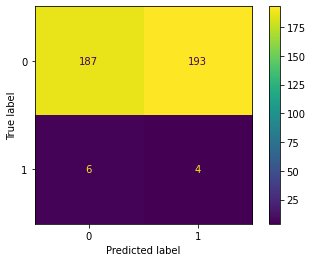

In [39]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {"n_neighbors": [3,5,7,11,15]}
model = KNeighborsClassifier(n_neighbors = 7)
model.fit(UOX, UOy.values.ravel())
from sklearn.metrics import plot_confusion_matrix
dsp = plot_confusion_matrix(model,xtest,ytest)
plt.show()

In [57]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
model = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, max_depth=10, random_state=0)
model.fit(xtrain, ytrain.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr_precision, lr_recall, _ = precision_recall_curve(ytest, lr_probs)
lr_f1, lr_auc = f1_score(ytest, yhat), auc(lr_recall, lr_precision)

#
#MODEL SMOTE DATA
model.fit(os_data_X, os_data_y.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr1_precision, lr1_recall, _ = precision_recall_curve(ytest, lr_probs)
lr1_f1, lr1_auc = f1_score(ytest, yhat), auc(lr1_recall, lr1_precision)
# summarize scores

#randomoversample
model.fit(os1_data_X, os1_data_y.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr2_precision, lr2_recall, _ = precision_recall_curve(ytest, lr_probs)
lr2_f1, lr2_auc = f1_score(ytest, yhat), auc(lr2_recall, lr2_precision)

#ADASYN
model.fit(os2_data_X, os2_data_y.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr3_precision, lr3_recall, _ = precision_recall_curve(ytest, lr_probs)
lr3_f1, lr3_auc = f1_score(ytest, yhat), auc(lr3_recall, lr3_precision)

#random undersample
model.fit(us_data_X, us_data_y.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr4_precision, lr4_recall, _ = precision_recall_curve(ytest, lr_probs)
lr4_f1, lr4_auc = f1_score(ytest, yhat), auc(lr4_recall, lr4_precision)

#random under, random over - even

model.fit(UOX,UOy.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr5_precision, lr5_recall, _ = precision_recall_curve(ytest, lr_probs)
lr5_f1, lr5_auc = f1_score(ytest, yhat), auc(lr5_recall, lr5_precision)

#random under, random over - ueven

model.fit(UOX2,UOy2.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr6_precision, lr6_recall, _ = precision_recall_curve(ytest, lr_probs)
lr6_f1, lr6_auc = f1_score(ytest, yhat), auc(lr6_recall, lr6_precision)

In [58]:
print("SCORE GB MODELS")
print('Raw: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
print('SMOTE: f1=%.3f auc=%.3f' % (lr1_f1, lr1_auc))
print('Random Oversample: f1=%.3f auc=%.3f' % (lr2_f1, lr2_auc))
print('ADASYN: f1=%.3f auc=%.3f' % (lr3_f1, lr3_auc))
print('Random Undersample: f1=%.3f auc=%.3f' % (lr4_f1, lr4_auc))
print('Random under over even: f1=%.3f auc=%.3f' % (lr5_f1, lr5_auc))
print('Random under over uneven: f1=%.3f auc=%.3f' % (lr6_f1, lr6_auc))

SCORE GB MODELS
Raw: f1=0.000 auc=0.016
SMOTE: f1=0.058 auc=0.038
Random Oversample: f1=0.000 auc=0.023
ADASYN: f1=0.059 auc=0.082
Random Undersample: f1=0.052 auc=0.298
Random under over even: f1=0.040 auc=0.238
Random under over uneven: f1=0.067 auc=0.032


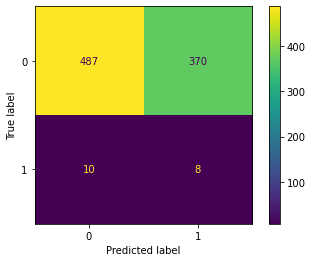

In [60]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
model = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, max_depth=10, random_state=0)
model.fit(UOX, UOy.values.ravel())
from sklearn.metrics import plot_confusion_matrix
dsp = plot_confusion_matrix(model,xtest,ytest)
plt.show()

In [64]:
from sklearn.ensemble import AdaBoostClassifier
model= AdaBoostClassifier(n_estimators=1000, learning_rate=0.1, random_state=0)
model.fit(xtrain, ytrain.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr_precision, lr_recall, _ = precision_recall_curve(ytest, lr_probs)
lr_f1, lr_auc = f1_score(ytest, yhat), auc(lr_recall, lr_precision)

#
#MODEL SMOTE DATA
model.fit(os_data_X, os_data_y.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr1_precision, lr1_recall, _ = precision_recall_curve(ytest, lr_probs)
lr1_f1, lr1_auc = f1_score(ytest, yhat), auc(lr1_recall, lr1_precision)
# summarize scores

#randomoversample
model.fit(os1_data_X, os1_data_y.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr2_precision, lr2_recall, _ = precision_recall_curve(ytest, lr_probs)
lr2_f1, lr2_auc = f1_score(ytest, yhat), auc(lr2_recall, lr2_precision)

#ADASYN
model.fit(os2_data_X, os2_data_y.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr3_precision, lr3_recall, _ = precision_recall_curve(ytest, lr_probs)
lr3_f1, lr3_auc = f1_score(ytest, yhat), auc(lr3_recall, lr3_precision)

#random undersample
model.fit(us_data_X, us_data_y.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr4_precision, lr4_recall, _ = precision_recall_curve(ytest, lr_probs)
lr4_f1, lr4_auc = f1_score(ytest, yhat), auc(lr4_recall, lr4_precision)

#random under, random over - even

model.fit(UOX,UOy.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr5_precision, lr5_recall, _ = precision_recall_curve(ytest, lr_probs)
lr5_f1, lr5_auc = f1_score(ytest, yhat), auc(lr5_recall, lr5_precision)

#random under, random over - ueven

model.fit(UOX2,UOy2.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr6_precision, lr6_recall, _ = precision_recall_curve(ytest, lr_probs)
lr6_f1, lr6_auc = f1_score(ytest, yhat), auc(lr6_recall, lr6_precision)

In [65]:
print("SCORE ADA MODELS")
print('Raw: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
print('SMOTE: f1=%.3f auc=%.3f' % (lr1_f1, lr1_auc))
print('Random Oversample: f1=%.3f auc=%.3f' % (lr2_f1, lr2_auc))
print('ADASYN: f1=%.3f auc=%.3f' % (lr3_f1, lr3_auc))
print('Random Undersample: f1=%.3f auc=%.3f' % (lr4_f1, lr4_auc))
print('Random under over even: f1=%.3f auc=%.3f' % (lr5_f1, lr5_auc))
print('Random under over uneven: f1=%.3f auc=%.3f' % (lr6_f1, lr6_auc))

SCORE ADA MODELS
Raw: f1=0.000 auc=0.025
SMOTE: f1=0.049 auc=0.027
Random Oversample: f1=0.000 auc=0.025
ADASYN: f1=0.048 auc=0.028
Random Undersample: f1=0.047 auc=0.019
Random under over even: f1=0.040 auc=0.018
Random under over uneven: f1=0.034 auc=0.024


In [71]:
from sklearn.naive_bayes import GaussianNB
model= GaussianNB()
model.fit(xtrain, ytrain.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr_precision, lr_recall, _ = precision_recall_curve(ytest, lr_probs)
lr_f1, lr_auc = f1_score(ytest, yhat), auc(lr_recall, lr_precision)

#MODEL SMOTE DATA
model.fit(os_data_X, os_data_y.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr1_precision, lr1_recall, _ = precision_recall_curve(ytest, lr_probs)
lr1_f1, lr1_auc = f1_score(ytest, yhat), auc(lr1_recall, lr1_precision)
# summarize scores

#randomoversample
model.fit(os1_data_X, os1_data_y.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr2_precision, lr2_recall, _ = precision_recall_curve(ytest, lr_probs)
lr2_f1, lr2_auc = f1_score(ytest, yhat), auc(lr2_recall, lr2_precision)

#ADASYN
model.fit(os2_data_X, os2_data_y.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr3_precision, lr3_recall, _ = precision_recall_curve(ytest, lr_probs)
lr3_f1, lr3_auc = f1_score(ytest, yhat), auc(lr3_recall, lr3_precision)

#random undersample
model.fit(us_data_X, us_data_y.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr4_precision, lr4_recall, _ = precision_recall_curve(ytest, lr_probs)
lr4_f1, lr4_auc = f1_score(ytest, yhat), auc(lr4_recall, lr4_precision)

#random under, random over - even

model.fit(UOX,UOy.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr5_precision, lr5_recall, _ = precision_recall_curve(ytest, lr_probs)
lr5_f1, lr5_auc = f1_score(ytest, yhat), auc(lr5_recall, lr5_precision)

#random under, random over - ueven

model.fit(UOX2,UOy2.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr6_precision, lr6_recall, _ = precision_recall_curve(ytest, lr_probs)
lr6_f1, lr6_auc = f1_score(ytest, yhat), auc(lr6_recall, lr6_precision)

In [72]:
print('Raw: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
print('SMOTE: f1=%.3f auc=%.3f' % (lr1_f1, lr1_auc))
print('Random Oversample: f1=%.3f auc=%.3f' % (lr2_f1, lr2_auc))
print('ADASYN: f1=%.3f auc=%.3f' % (lr3_f1, lr3_auc))
print('Random Undersample: f1=%.3f auc=%.3f' % (lr4_f1, lr4_auc))
print('Random under over even: f1=%.3f auc=%.3f' % (lr5_f1, lr5_auc))
print('Random under over uneven: f1=%.3f auc=%.3f' % (lr6_f1, lr6_auc))

Raw: f1=0.041 auc=0.022
SMOTE: f1=0.041 auc=0.020
Random Oversample: f1=0.039 auc=0.022
ADASYN: f1=0.040 auc=0.020
Random Undersample: f1=0.040 auc=0.510
Random under over even: f1=0.040 auc=0.510
Random under over uneven: f1=0.040 auc=0.019


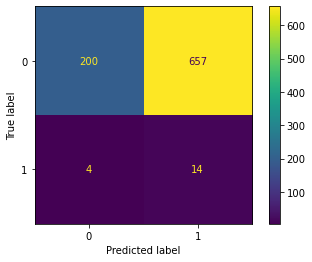

In [77]:
from sklearn.naive_bayes import GaussianNB
model= GaussianNB()
model.fit(xtrain, ytrain.values.ravel())
from sklearn.metrics import plot_confusion_matrix
dsp = plot_confusion_matrix(model,xtest,ytest)
plt.show()

In [75]:
from sklearn.naive_bayes import BernoulliNB
model= BernoulliNB()
model.fit(xtrain, ytrain.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr_precision, lr_recall, _ = precision_recall_curve(ytest, lr_probs)
lr_f1, lr_auc = f1_score(ytest, yhat), auc(lr_recall, lr_precision)

#MODEL SMOTE DATA
model.fit(os_data_X, os_data_y.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr1_precision, lr1_recall, _ = precision_recall_curve(ytest, lr_probs)
lr1_f1, lr1_auc = f1_score(ytest, yhat), auc(lr1_recall, lr1_precision)
# summarize scores

#randomoversample
model.fit(os1_data_X, os1_data_y.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr2_precision, lr2_recall, _ = precision_recall_curve(ytest, lr_probs)
lr2_f1, lr2_auc = f1_score(ytest, yhat), auc(lr2_recall, lr2_precision)

#ADASYN
model.fit(os2_data_X, os2_data_y.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr3_precision, lr3_recall, _ = precision_recall_curve(ytest, lr_probs)
lr3_f1, lr3_auc = f1_score(ytest, yhat), auc(lr3_recall, lr3_precision)

#random undersample
model.fit(us_data_X, us_data_y.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr4_precision, lr4_recall, _ = precision_recall_curve(ytest, lr_probs)
lr4_f1, lr4_auc = f1_score(ytest, yhat), auc(lr4_recall, lr4_precision)

#random under, random over - even

model.fit(UOX,UOy.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr5_precision, lr5_recall, _ = precision_recall_curve(ytest, lr_probs)
lr5_f1, lr5_auc = f1_score(ytest, yhat), auc(lr5_recall, lr5_precision)

#random under, random over - ueven

model.fit(UOX2,UOy2.values.ravel())
# predict probabilities
lr_probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(xtest)
lr6_precision, lr6_recall, _ = precision_recall_curve(ytest, lr_probs)
lr6_f1, lr6_auc = f1_score(ytest, yhat), auc(lr6_recall, lr6_precision)

In [76]:
print('Raw: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
print('SMOTE: f1=%.3f auc=%.3f' % (lr1_f1, lr1_auc))
print('Random Oversample: f1=%.3f auc=%.3f' % (lr2_f1, lr2_auc))
print('ADASYN: f1=%.3f auc=%.3f' % (lr3_f1, lr3_auc))
print('Random Undersample: f1=%.3f auc=%.3f' % (lr4_f1, lr4_auc))
print('Random under over even: f1=%.3f auc=%.3f' % (lr5_f1, lr5_auc))
print('Random under over uneven: f1=%.3f auc=%.3f' % (lr6_f1, lr6_auc))

Raw: f1=0.029 auc=0.023
SMOTE: f1=0.041 auc=0.024
Random Oversample: f1=0.063 auc=0.024
ADASYN: f1=0.043 auc=0.023
Random Undersample: f1=0.051 auc=0.024
Random under over even: f1=0.045 auc=0.022
Random under over uneven: f1=0.034 auc=0.025


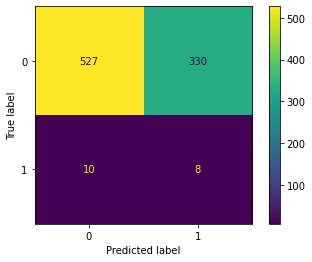

In [79]:
from sklearn.naive_bayes import BernoulliNB
model= BernoulliNB()
model.fit(UOX, UOy.values.ravel())
from sklearn.metrics import plot_confusion_matrix
dsp = plot_confusion_matrix(model,xtest,ytest)
plt.show()

No Skill ROC AUC 0.493
Logistic ROC AUC 0.500


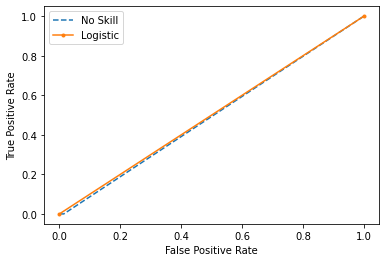

In [59]:
#ROC curves
from matplotlib import pyplot
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# plot no skill and model roc curves
def plot_roc_curve(test_y, naive_probs, model_probs):
	# plot naive skill roc curve
	fpr, tpr, _ = roc_curve(test_y, naive_probs)
	pyplot.plot(fpr, tpr, linestyle='--', label='No Skill')
	# plot model roc curve
	fpr, tpr, _ = roc_curve(test_y, model_probs)
	pyplot.plot(fpr, tpr, marker='.', label='Logistic')
	# axis labels
	pyplot.xlabel('False Positive Rate')
	pyplot.ylabel('True Positive Rate')
	# show the legend
	pyplot.legend()
	# show the plot
	pyplot.show()
    
# no skill model, stratified random class predictions
model = DummyClassifier(strategy='stratified')
model.fit(xtrain, ytrain)
yhat = model.predict_proba(xtest)
naive_probs = yhat[:, 1]
# calculate roc auc
roc_auc = roc_auc_score(ytest, naive_probs)
print('No Skill ROC AUC %.3f' % roc_auc)
# skilled model
model = lw.RIPPER(prune_size =0.01, k =10, random_state=42)
model.fit(xtrain, ytrain, require_min_samples=False)
yhat = model.predict_proba(xtest)
model_probs = yhat[:, 1]
# calculate roc auc
roc_auc = roc_auc_score(ytest, model_probs)
print('Logistic ROC AUC %.3f' % roc_auc)
# plot roc curves
plot_roc_curve(ytest, naive_probs, model_probs)


No Skill PR AUC: 0.008
Logistic PR AUC: 0.508


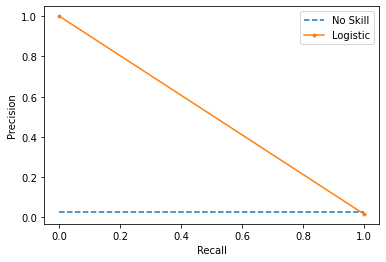

In [63]:
# plot no skill and model precision-recall curves
def plot_pr_curve(test_y, model_probs):
	# calculate the no skill line as the proportion of the positive class
	no_skill = 9/335
	# plot the no skill precision-recall curve
	pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
	# plot model precision-recall curve
	precision, recall, _ = precision_recall_curve(ytest, model_probs)
	pyplot.plot(recall, precision, marker='.', label='Logistic')
	# axis labels
	pyplot.xlabel('Recall')
	pyplot.ylabel('Precision')
	# show the legend
	pyplot.legend()
	# show the plot
	pyplot.show()



# generate 2 class dataset
# no skill model, stratified random class predictions
model = DummyClassifier(strategy='stratified')
model.fit(xtrain, ytrain.values.ravel())
yhat = model.predict_proba(xtest)
naive_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(ytest, naive_probs)
auc_score = auc(recall, precision)
print('No Skill PR AUC: %.3f' % auc_score)
# fit a model
model = lw.RIPPER(prune_size =0.01, k =10, random_state=42)
model.fit(xtrain, ytrain, require_min_samples=False)
yhat = model.predict_proba(xtest)
model_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(ytest, model_probs)
auc_score = auc(recall, precision)
print('Logistic PR AUC: %.3f' % auc_score)
# plot precision-recall curves
plot_pr_curve(ytest, model_probs)